# Plot real-time epoch data with LSL client

In [2]:
# Author: Teon Brooks <teon.brooks@gmail.com>
#
# License: BSD (3-clause)
%matplotlib notebook

import matplotlib.pyplot as plt

from mne.datasets import sample
from mne.io import read_raw_fif

from mne_realtime import LSLClient, MockLSLStream

In [3]:
#This import is only for making bigger plots. It can be removed.
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 6]
import pandas as pd

from mne.stats import bootstrap_confidence_interval
from mne.datasets import somato
from mne.baseline import rescale

import mne as mne

In [4]:
print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
# this is the host id that identifies your stream on LSL
host = 'mne_stream1123'
# this is the max wait time in seconds until client connection
wait_max = 5

In [6]:
'''Loading data'''
df = pd.read_csv("data/Feb-15-Borja-ojos-cerrados-Activity-No-Labels-BBT-E16-AAA005-2020-02-15_12-59-21/EEG.csv")
df_mne = df.drop(['timestamp', 'sequence', 'battery', 'flags'], axis=1)

'''Transpose'''
data_mne = df_mne.to_numpy().transpose()

'''Scale'''
data_mne = data_mne / 1000000

'''Raw info'''
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz']
info_mne = mne.create_info(
    #ch_names=list(df_mne.columns),
    ch_names=channels,
    ch_types='eeg',
    sfreq=256)

bbt_raw = mne.io.RawArray(data_mne, info_mne)
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

'''Final Raw object'''
raw = bbt_raw.copy().set_montage(ten_twenty_montage)

Creating RawArray with float64 data, n_channels=16, n_times=31328
    Range : 0 ... 31327 =      0.000 ...   122.371 secs
Ready.
DigMontage is a superset of info. 78 in DigMontage will be ignored. The ignored channels are: {'P7', 'T9', 'PO9', 'P8', 'AF1', 'AF10', 'F2', 'PO8', 'POz', 'PO2', 'PO7', 'FT10', 'FC4', 'C5', 'PO1', 'T10', 'AF3', 'T4', 'F9', 'A2', 'FT8', 'AF8', 'FCz', 'AF4', 'T7', 'FT7', 'PO6', 'PO4', 'M1', 'FC6', 'O9', 'Iz', 'TP10', 'P1', 'T3', 'P10', 'FC3', 'P5', 'CPz', 'PO3', 'F6', 'F5', 'T5', 'O10', 'F1', 'T8', 'Fpz', 'P6', 'AF9', 'PO5', 'T6', 'PO10', 'AFz', 'P3', 'FT9', 'AF2', 'AF5', 'A1', 'Fz', 'CP6', 'P2', 'P9', 'TP9', 'FC1', 'F8', 'TP7', 'AF7', 'C6', 'Oz', 'CP5', 'P4', 'AF6', 'FC5', 'M2', 'FC2', 'F7', 'F10', 'TP8'}


In [12]:
# For this example, let's use the mock LSL stream.
stream = MockLSLStream(host, raw, 'eeg', time_dilation=1)
stream.start()

now sending data...


<IPython.core.display.Javascript object>


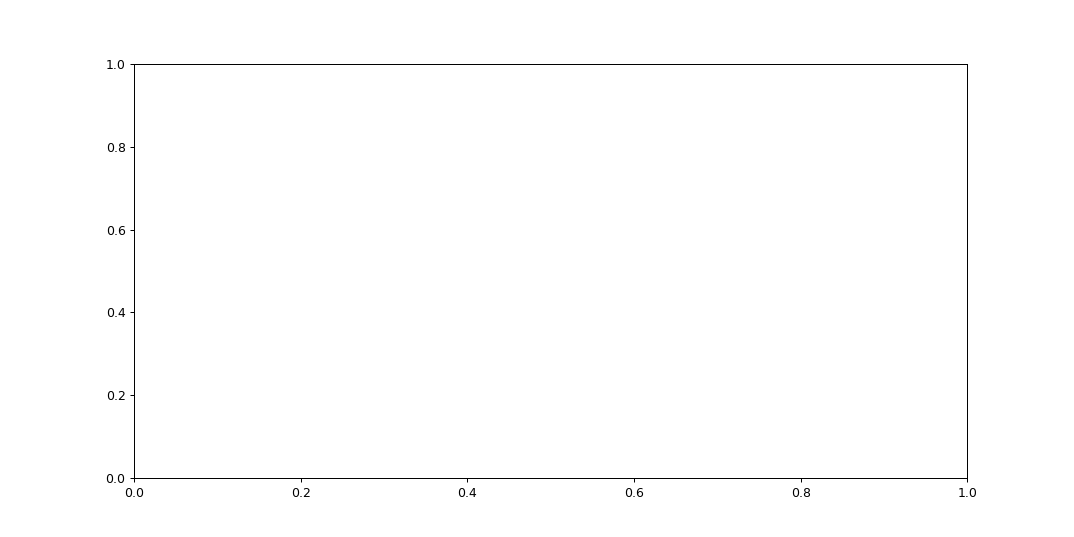

Client: Waiting for server to start
Client: Connected
<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F3, F4, C1, C3, C2, C4, CP1, ...
    chs : list | 16 items (EEG: 16)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 19 items (3 Cardinal, 16 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 16
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq :

In [13]:
# Let's observe it
plt.ion()  # make plot interactive
_, ax = plt.subplots(1)
with LSLClient(info=raw.info, host=host, port=1024, wait_max=wait_max) as client:
    client_info = client.get_measurement_info()
    sfreq = int(client_info['sfreq'])
    print(client_info)

    # let's observe ten seconds of data
    for ii in range(20):
        plt.cla()
        epoch = client.get_data_as_epoch(n_samples=sfreq)
        epoch.plot(axes=ax, )
        plt.pause(1)
plt.draw()

In [8]:
# Let's terminate the mock LSL stream
stream.stop()

Stopping stream...
